In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from matplotlib import rcParams as rcP
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Pune_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Alandi Road,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Ambegaon Budruk,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Anandnagar,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Aundh,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Aundh Road,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [7]:
df.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [8]:
df.groupby('availability')['availability'].agg('count')

,availability
availability,
14-Jul,1
14-Nov,1
15-Aug,1
15-Dec,1
15-Jun,1
...,...
22-Mar,3
22-May,10
22-Nov,2


In [9]:
df.groupby('size')['size'].agg('count')

,size
size,
1 BHK,538
1 Bedroom,105
1 RK,13
10 BHK,2
10 Bedroom,12
11 BHK,2
11 Bedroom,2
12 Bedroom,1
13 BHK,1


In [10]:
df.groupby('location')['location'].agg('count')


,location
location,
Alandi Road,139
Ambegaon Budruk,139
Anandnagar,139
Aundh,139
Aundh Road,139
...,...
Wakadewadi,138
Wanowrie,138
Warje,138


In [11]:
#df = df.drop('society',axis='columns')
#df.head()
# Check if the 'society' column exists in the DataFrame
if 'society' in df.columns:
    df = df.drop('society', axis='columns')
else:
    print("Column 'society' not found in DataFrame.")
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Alandi Road,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Ambegaon Budruk,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Anandnagar,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Aundh,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Aundh Road,2 BHK,1200,2.0,1.0,51.00


DATA CLEANING PROCESS

In [12]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [13]:
from math import floor
balcony_median = floor(df.balcony.median())
balcony_median=float(floor(df.bath.median()))

df.balcony=df.balcony.fillna(balcony_median)
df.bath=df.bath.fillna(balcony_median)

In [14]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,0
balcony,0
price,0


In [15]:
df=df.dropna()
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [16]:
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))
df=df.drop('size',axis='columns')
df.groupby('bhk')['bhk'].agg('count')

,bhk
bhk,
1,656
2,5527
3,4857
4,1417
5,356
6,221
7,100
8,89
9,54


In [17]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def isFloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [19]:
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Gultekdi,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Model colony,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Shukrawar Peth,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Ganeshkhind,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,Khadaki,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Gokhale Nagar,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Anandnagar,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Vadgaon Budruk,1020 - 1130,2.0,2.0,52.570,1
13265,Super built-up Area,20-Sep,Dapodi,1133 - 1384,2.0,0.0,59.135,2


In [20]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return(float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [21]:
df['new_total_sqft']=df.total_sqft.apply(convert_sqft_to_num)
df=df.drop('total_sqft',axis='columns')
df.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Alandi Road,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Ambegaon Budruk,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Anandnagar,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Aundh,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Aundh Road,2.0,1.0,51.00,2,1200.0


In [22]:
df.isna().sum()

,0
area_type,0
availability,0
location,0
bath,0
balcony,0
price,0
bhk,0
new_total_sqft,46


In [23]:
df=df.dropna()
df.isna().sum()

,0
area_type,0
availability,0
location,0
bath,0
balcony,0
price,0
bhk,0
new_total_sqft,0


FEATURE ENGINEERING

In [24]:
#adding a new column of price_per_sqtf
df1=df.copy()

#in our dataset the price column is in lakhs
df1['price_per_sqft']=df1['price']*100000/df1['new_total_sqft']
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Alandi Road,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Ambegaon Budruk,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Anandnagar,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Aundh,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Aundh Road,2.0,1.0,51.00,2,1200.0,4250.000000


In [25]:
#checking unique values of 'location' column
#checking unique values of 'location' column
# Assuming the column name is 'location' instead of 'site_location'
locations = list(df['location'].unique())
print(len(locations))

97


In [26]:
# Assuming the column is 'location' instead of 'site_location'
df1['location'] = df1['location'].apply(lambda x: x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Ambegaon Budruk,139
Chandan Nagar,139
Anandnagar,139
Aundh Road,139
Baner,139
...,...
Nagar Road,136
Shivaji Nagar,136
Wakadewadi,136


In [27]:
# Instead of using 'site_location', use 'location'
print(len(location_stats[location_stats<=10]),len(df1.location.unique()))

1 97


In [28]:
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Alandi Road,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Ambegaon Budruk,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Anandnagar,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Aundh,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Aundh Road,2.0,1.0,51.00,2,1200.0,4250.000000


In [29]:
#Labelling the location with less than or equal to 10 accurences to 'other
locations_less_than_10=location_stats[location_stats<=10]
# Use 'location' instead of 'site_location'
df1.location=df1.location.apply(lambda x:'other' if x in locations_less_than_10 else x)
len(df1.location.unique())

97

In [30]:
#checking the unique values in 'availability column'
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

,availability
availability,
Ready To Move,10541
18-Dec,306
18-May,294
18-Apr,271
18-Aug,199
...,...
16-Nov,1
15-Dec,1
15-Aug,1


In [31]:
#labelling the dates into Not ready
dates=df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
dates_not_ready=dates[dates<10000]
df1.availability=df1.availability.apply(lambda x:'Not Ready' if x in dates_not_ready else x)
len(df1.availability.unique())

2

In [32]:
df.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Alandi Road,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Ambegaon Budruk,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Anandnagar,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Aundh,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Aundh Road,2.0,1.0,51.00,2,1200.0


In [33]:
df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

,area_type
area_type,
Super built-up Area,8778
Built-up Area,2402
Plot Area,1991
Carpet Area,86


REMOVING OUTLIERS

In [34]:
df2=df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2),len(df1))

12513 13257


In [35]:
df2.price_per_sqft.describe()

,price_per_sqft
count,12513.000000
mean,6307.567166
std,4160.879784
min,267.829813
25%,4211.469534
50%,5295.138889
75%,6916.666667
max,176470.588235


In [36]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,sub_df in df.groupby('location'):
    m=np.mean(sub_df.price_per_sqft)
    sd=np.std(sub_df.price_per_sqft)
    reduced_df=sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<=(m+sd))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df3=remove_pps_outliers(df2)
print(len(df3),len(df2))

10937 12513


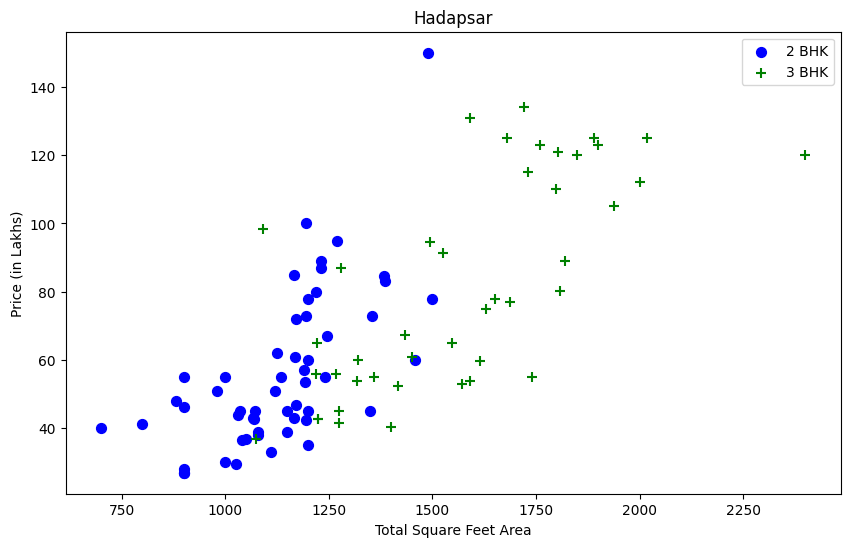

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (10,6)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df3, 'Hadapsar')

In [38]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' Location hence removing such outliers is necessary
def remove_bhk_outliers(df):
  exclude_indices = np.array([])

  for location, location_df in df.groupby('location'):
    bhk_stats = {}

    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }

    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk - 1)
      if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

  return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

10937 7459


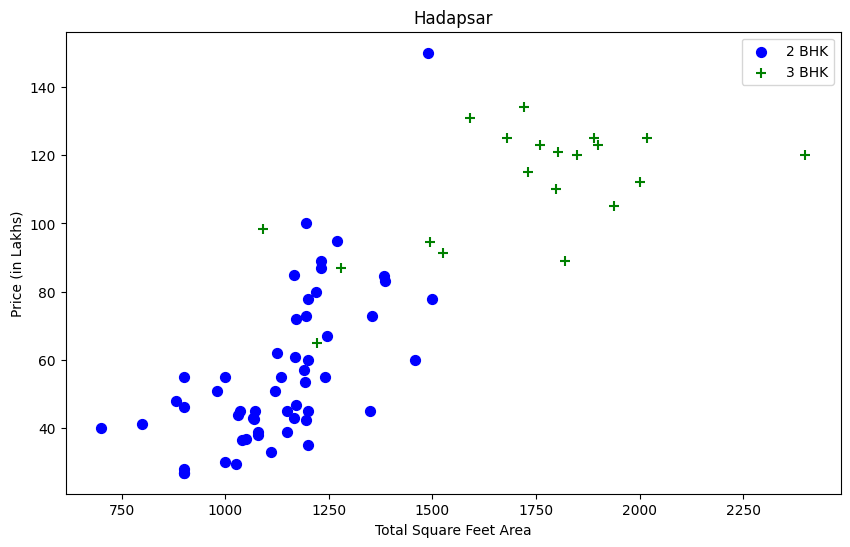

In [39]:
plot_scatter_chart(df4, 'Hadapsar')

Text(0, 0.5, 'Count')

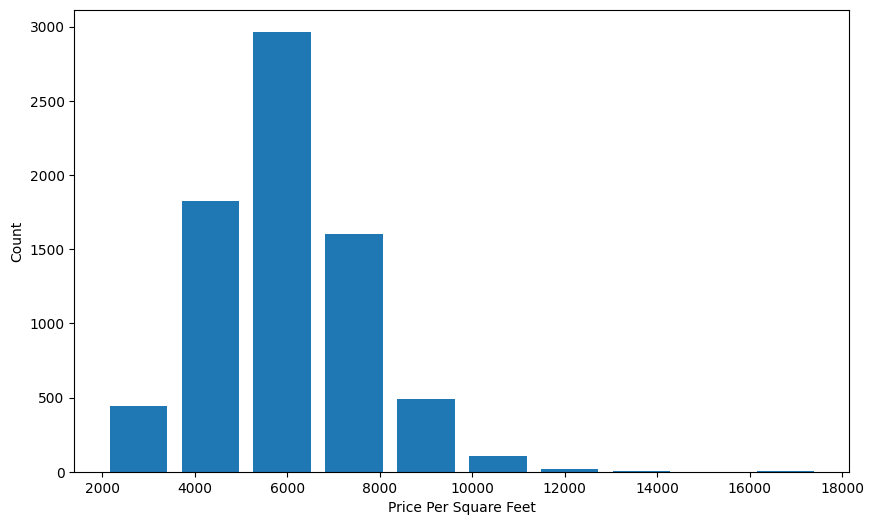

In [40]:
plt.hist(df4.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

<ipython-input-41-c0b1ff7987b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='area_type', y='price', palette='Set2')


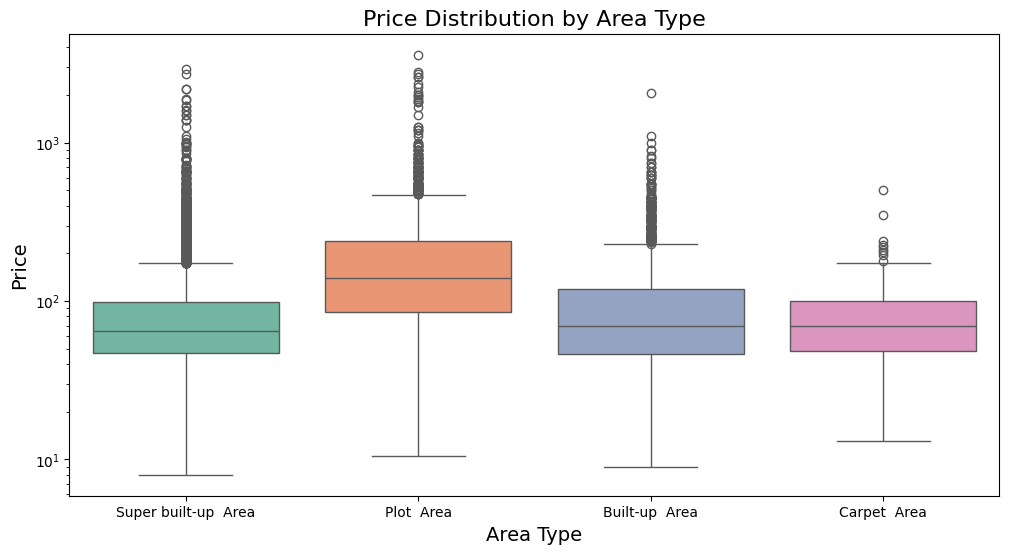

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='area_type', y='price', palette='Set2')
plt.title('Price Distribution by Area Type', fontsize=16)
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.yscale('log') #Log scale for better visualization of outliers
plt.show()

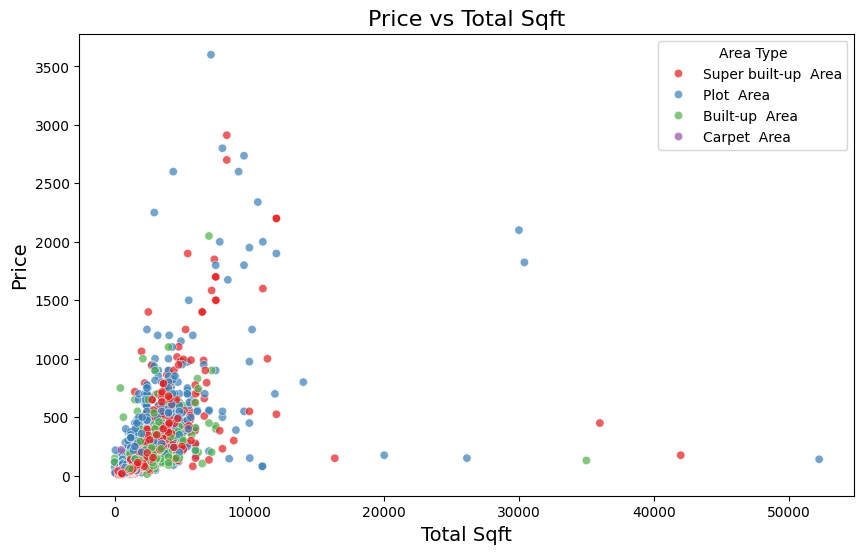

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='new_total_sqft', y='price', hue='area_type', palette='Set1', alpha=0.7)
plt.title('Price vs Total Sqft', fontsize=16)
plt.xlabel('Total Sqft', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Area Type')
plt.show()

<ipython-input-43-cd2dc07c0f44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bhk_counts.index, y=bhk_counts.values, palette='cool')


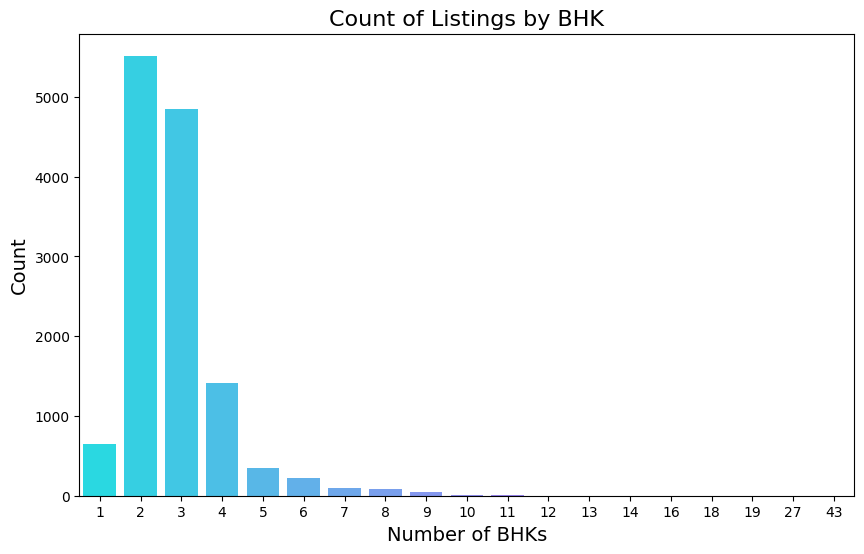

In [43]:
plt.figure(figsize=(10, 6))
bhk_counts = df['bhk'].value_counts().sort_index()
sns.barplot(x=bhk_counts.index, y=bhk_counts.values, palette='cool')
plt.title('Count of Listings by BHK', fontsize=16)
plt.xlabel('Number of BHKs', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

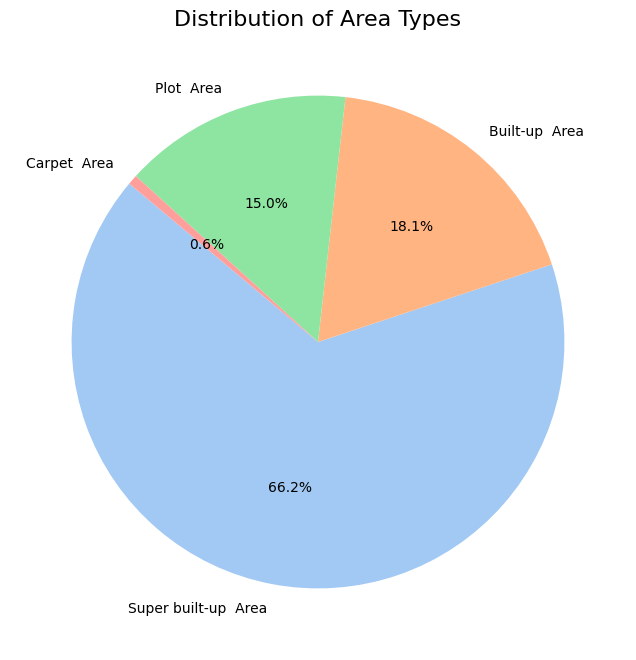

In [44]:

plt.figure(figsize=(8, 8))
area_type_counts = df['area_type'].value_counts()
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Area Types', fontsize=16)
plt.show()

Text(0, 0.5, 'Count')

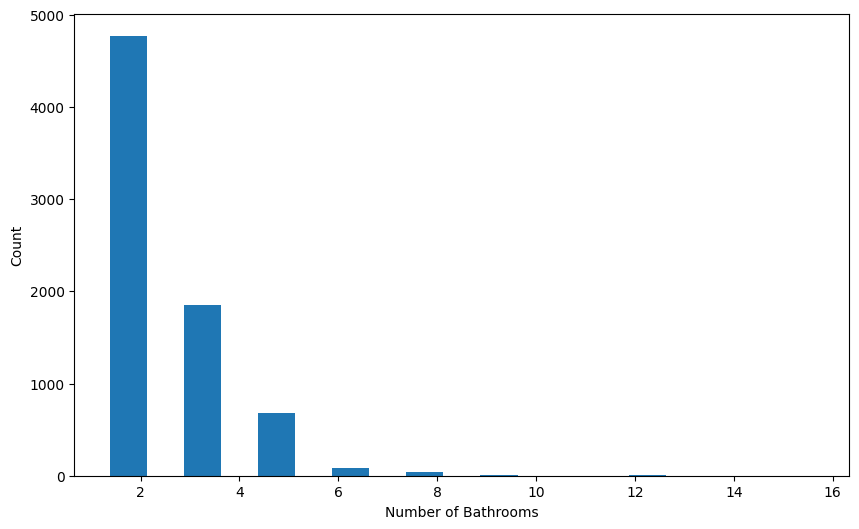

In [45]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [46]:
df5=df4[df4.bath<(df4.bhk+2)]
print(len(df4),len(df5))

7459 7395


In [47]:

df5.tail()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
10923,Super built-up Area,Not Ready,Yerawada,2.0,1.0,67.0,2,1165.0,5751.072961
10928,Built-up Area,Ready To Move,Yerawada,6.0,2.0,115.0,6,3500.0,3285.714286
10931,Built-up Area,Not Ready,Yerawada,2.0,2.0,353.0,5,3210.0,10996.884735
10932,Super built-up Area,Ready To Move,Yerawada,2.0,2.0,54.0,2,1050.0,5142.857143
10936,Super built-up Area,Not Ready,Yerawada,2.0,1.0,70.0,2,1132.0,6183.745583


In [48]:
df6=df5.copy()
df6=df6.drop('price_per_sqft',axis='columns')

In [49]:
df6.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,Not Ready,Alandi Road,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Alandi Road,4.0,1.0,245.00,4,2894.0
2,Super built-up Area,Ready To Move,Alandi Road,2.0,2.0,50.00,2,1084.0
3,Super built-up Area,Ready To Move,Alandi Road,2.0,2.0,80.00,2,1230.0
4,Super built-up Area,Ready To Move,Alandi Road,3.0,2.0,130.00,3,1750.0


In [50]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.location)
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [51]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [52]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [53]:
df6.drop(['area_type','availability','location'],axis='columns',inplace=True)
df.head(10)

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Alandi Road,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Ambegaon Budruk,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Anandnagar,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Aundh,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Aundh Road,2.0,1.0,51.00,2,1200.0
5,Super built-up Area,Ready To Move,Balaji Nagar,2.0,1.0,38.00,2,1170.0
6,Super built-up Area,18-May,Baner,4.0,2.0,204.00,4,2732.0
7,Super built-up Area,Ready To Move,Baner road,4.0,2.0,600.00,4,3300.0
8,Super built-up Area,Ready To Move,Bhandarkar Road,3.0,1.0,63.25,3,1310.0
9,Plot Area,Ready To Move,Bhavani Peth,6.0,2.0,370.00,6,1020.0


In [54]:
df6.shape

(7395, 105)

In [55]:
X = df6.drop('price', axis='columns')
y = df6['price']

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [57]:
# Creating a function for GridSearchCV

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {

            }
        },

        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_parameters,accuracy
0,linear_regression,{},0.835449
1,lasso,"{'alpha': 2, 'selection': 'random'}",0.829244
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.772436


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
model.score(X_test, y_test)

0.818057198775895

In [61]:
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       ...
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada', 'Ready To Move', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area'],
      dtype='object', length=104)

In [62]:
np.where(X.columns=='Balaji Nagar')[0][0]

np.int64(9)

In [63]:
# Trying to access the column 'Built-up  Area',which we dropped in cell no. [48].
# Instead, you should search for the new column name created by get_dummies
# Change 'Built-up  Area' with 'Built-up  Area', the column name given to us after using pandas get_dummies.
np.where(X.columns=='Built-up  Area')[0][0]

np.int64(101)

In [64]:
np.where(X.columns=='Ready To Move')[0][0]

np.int64(100)

In [65]:
#Creating a function to prredict values
def prediction(location,bhk,bath,balcony,sqft,area_type,availability):

  loc_index, area_index, avail_index = -1,-1,-1

  if location != 'other':
    loc_index = int(np.where(X.columns == location)[0][0])

  # Fix: Use the correct column name for area_type after one-hot encoding
  # Example: if the original 'area_type' column had a value 'Built-up  Area',
  # the new column name after get_dummies would be 'Built-up  Area'
  if area_type != 'Super built-up  Area':
    # Check if the area_type is in the columns
    if area_type in X.columns:
      area_index = np.where(X.columns == area_type)[0][0]
    else:
      # Handle the case where area_type is not found
      print(f"Warning: area_type '{area_type}' not found in columns.")
      # You might want to assign a default value or raise an exception here

  if availability != 'Not Ready':
    avail_index = np.where(X.columns == availability)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = bath
  x[1] = balcony
  x[2] = bhk
  x[3] = sqft

  if loc_index >=0:
    x[loc_index] = 1

  if area_index >=0:
    x[area_index] = 1

  if avail_index >=0:
    x[avail_index] = 1

  return model.predict([x])[0]

In [66]:
# Assuming you want to use 'Built-up  Area' as the area_type
area_type = 'Built-up  Area'
area_index = np.where(X.columns == area_type)[0][0]

In [67]:
prediction('Hadapsar', 2, 2, 2, 1000, 'Super built-up  Area', 'Ready To Move')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(52.09543340932093)

In [68]:
prediction('Balaji Nagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(52.17049124040558)

In [69]:
prediction('Camp', 2, 3, 2, 2000, 'Plot Area', 'Ready To Move')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(125.99080372874636)

In [70]:
prediction('Baner', 2, 3, 2, 2000, 'Plot Area', 'Not Ready')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(127.05292462415557)

In [73]:
import pickle

# Assuming X.columns is a list of all column names in your dataset
locations_list = [col.capitalize() for col in ['aundh', 'baner', 'kothrud', 'wakad', 'hinjewadi', 'pimple_saudagar']]  # Replace with your actual locations
area_types_list = [col.capitalize() for col in ['built_up_area', 'carpet_area', 'plot_area', 'super_built_up_area']]
availability_list = [col.capitalize() for col in ['ready_to_move', 'under_construction', 'not_ready']]

# Generate the dictionary for columns.pkl
data_columns = {
    'data_columns': X.columns.tolist(),  # List of all column names from your model
    'locations': locations_list,         # Dynamically extracted or manually defined
    'area_types': area_types_list,
    'availabilities': availability_list
}

with open('pune_house_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Fix: Open the file in write mode ('wb') to create and save the data
with open('columns.pkl', 'wb') as f:
    pickle.dump(data_columns, f)


